# Medical Insurance Price Prediction

### Dataset Overview.

The medical insurance dataset encompasses various factors influencing medical expenses, such as age, sex, BMI, smoking status, number of children, and region. This dataset serves as a foundation for training machine learning models capable of forecasting medical expenses for new policyholders.

Its purpose is to shed light on the pivotal elements contributing to increased insurance costs, aiding the company in making more informed decisions concerning pricing and risk assessment.

The dataset comprises 2.7K rows and 7 columns, including:

Age , 
Sex ,
BMI (Body Mass Index) ,
Children ,
Smoker ,
Region , 
Charges 

### Importing all the recquired libraries :- 

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np 
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import precision_recall_fscore_support
#fram sklearn,neural_network import NLPRegressor
from math import sqrt

#### Importing the dataset

In [2]:
df=pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Creating a copy of original data and storing it in df1.
df1=df.copy()

In [4]:
#Last five values from dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229
2771,54,male,31.600,0,no,southwest,9850.43200


In [5]:
#To get information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
# Above we can see:-
# There are 2 float values , 2 integer values , 3 object type.
# There are total 7 columns.
# Total 2771 rows.

In [7]:
# Description for integer and float columns
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
# Above we can see:-
# Average age is 39, Maximum age is 64.
# Average bmi is 30
# Average cost is 13261 , Max cost is 63770.

In [9]:
# Shape of the dataset
df.shape

(2772, 7)

In [10]:
# Above we can see:-
# There are total 2772 rows and 7 columns.

In [11]:
# Column names
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# It shows from which region number of entries belong
df["region"].value_counts()

region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64

In [13]:
# To check the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

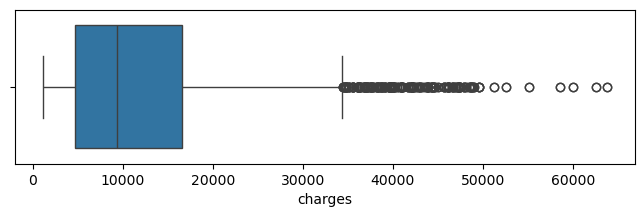

In [14]:
# Checking for outliers in charges using boxplot
plt.figure(figsize=(8, 2)) 
sns.boxplot(x=df['charges'])
plt.show()

There are some outliers present in charges column.

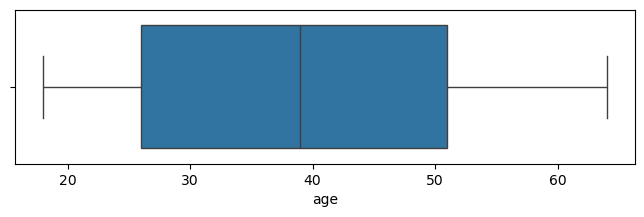

In [15]:
# Checking for outliers in age using boxplot
plt.figure(figsize=(8, 2)) 
sns.boxplot(x=df['age'])
plt.show()

No outliers present in age column

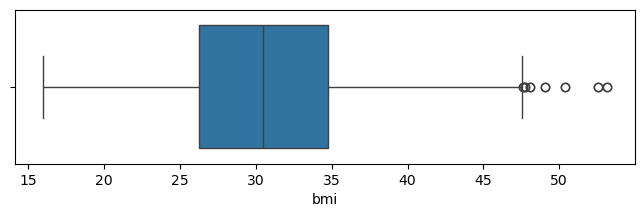

In [16]:
# Checking for outliers in bmi using boxplot
plt.figure(figsize=(8, 2)) 
sns.boxplot(x=df['bmi'])
plt.show()

There are some outliers present in bmi column.

#### Handling outliers from charges column

In [17]:
# Calculate Z-score for 'charges'
z_scores = np.abs(stats.zscore(df['charges']))

# Define the threshold for outliers
outlier_threshold = 3

# Count outliers
outliers_count = np.sum(z_scores > outlier_threshold)

print(f"Number of outliers in 'charges' column: {outliers_count}")

Number of outliers in 'charges' column: 14


In [24]:
# Calculate Q1, Q3, and IQR for 'charges' column
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers within the same DataFrame
df= df[(df['charges'] >= lower_bound) & (df['charges'] <= upper_bound)]

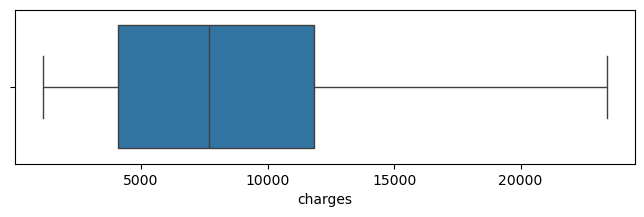

In [25]:
# Checking for outliers in charges using boxplot
plt.figure(figsize=(8, 2)) 
sns.boxplot(x=df['charges'])
plt.show()

In [26]:
# Calculate Z-score for 'charges'
z_scores = np.abs(stats.zscore(df['charges']))

# Define the threshold for outliers
outlier_threshold = 3

# Count outliers
outliers_count = np.sum(z_scores > outlier_threshold)

print(f"Number of outliers in 'charges' column: {outliers_count}")

Number of outliers in 'charges' column: 0


#### Handling outliers from bmi column 

In [27]:
# Calculate Z-score for 'charges'
z_scores = np.abs(stats.zscore(df['bmi']))

# Define the threshold for outliers
outlier_threshold = 3

# Count outliers
outliers_count = np.sum(z_scores > outlier_threshold)

print(f"Number of outliers in 'bmi' column: {outliers_count}")

Number of outliers in 'bmi' column: 6


In [30]:
# Calculate Q1, Q3, and IQR for 'charges' column
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers within the same DataFrame
df= df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

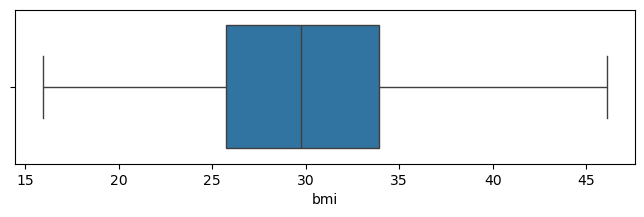

In [31]:
# Checking for outliers in charges using boxplot
plt.figure(figsize=(8, 2)) 
sns.boxplot(x=df['bmi'])
plt.show()

In [32]:
# Calculate Z-score for 'charges'
z_scores = np.abs(stats.zscore(df['bmi']))

# Define the threshold for outliers
outlier_threshold = 3

# Count outliers
outliers_count = np.sum(z_scores > outlier_threshold)

print(f"Number of outliers in 'bmi' column: {outliers_count}")

Number of outliers in 'bmi' column: 0


### Data Visualization

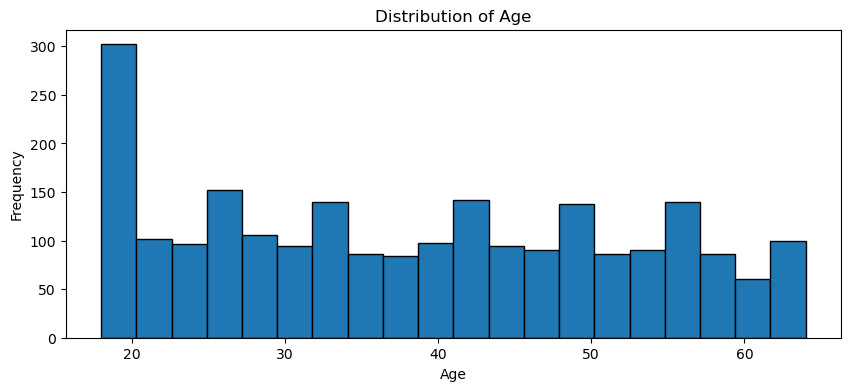

In [33]:
# Histogram that shoows age distribution
plt.figure(figsize=(10,4))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [34]:
# Observations from above Histogram
# There are 300+ peoples are present between age 1-20
# There are 500+ peoples are present between age 20-30
# There are 500+ peoples are present between age 30-40
# There are 500+ peoples are present between age 40-50
# There are 450+ peoples are present between age 50-60
# There are 150+ peoples are present above age 60

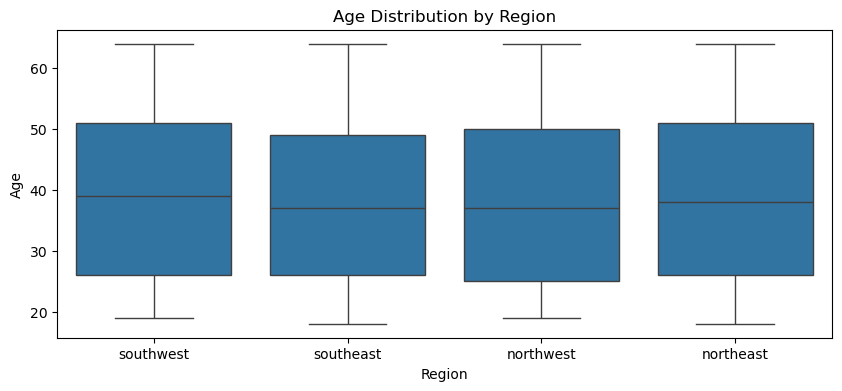

In [35]:
# Age distribution by region
plt.figure(figsize=(10,4))
sns.boxplot(x='region', y='age', data=df)
plt.xlabel('Region')
plt.ylabel('Age')
plt.title('Age Distribution by Region')
plt.show()

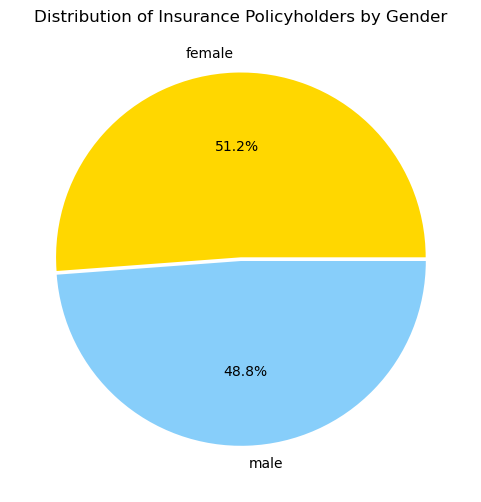

In [36]:
# Pie chart that shows the distribution of policy holders by gender
sex_counts = df['sex'].value_counts()

explode = [0.02, 0] # It shows for female 0.02 explode and 0 for male
colors=['gold','lightskyblue']

plt.figure(figsize=(6, 6))
sex_counts.plot(kind='pie', autopct='%1.1f%%', labels=sex_counts.index,colors=colors, explode=explode)
plt.title('Distribution of Insurance Policyholders by Gender')
plt.ylabel('')  
plt.show()

In [37]:
# Observations are :-
# There are 51.2 % of policy holders are female.
# There are 48.8 % of policy holders are male.

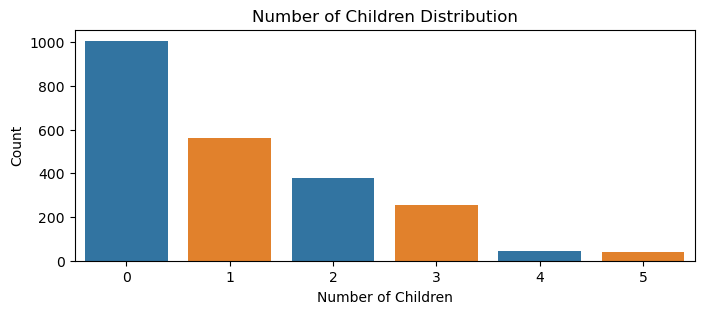

In [38]:
# Number of childrens for policy holders
plt.figure(figsize=(8,3))
sns.countplot(x='children', data=df,palette=['#1f77b4', '#ff7f0e'])
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.title('Number of Children Distribution')
plt.show()

In [39]:
# Observation from above graph
# There are more number  of the policy holders dont have childrens.
# 500+ policy holders having 1 child
# 300+ policy holders having 2 childrens.
# 200+ policy holders having 3 childrens.
# least number of plocy holders having 4 or 5 childrens

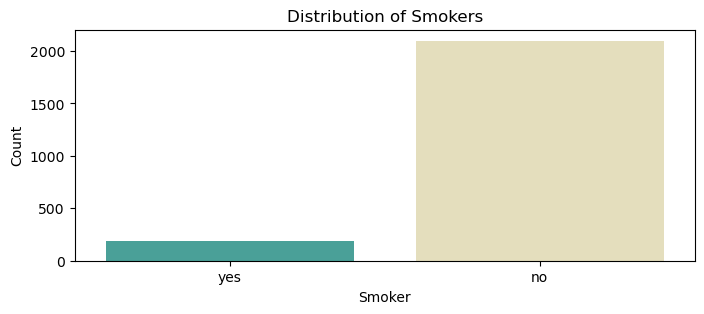

In [40]:
# Number of smoker 
plt.figure(figsize=(8,3))
sns.countplot(x='smoker', data=df,palette=['#3CAEA3', '#eae2b7'])
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Distribution of Smokers')
plt.show()

In [68]:
# Observation :-
# Most of the policyholders are non smokers.
# There are total 188 smokers  and 2098 non smoker present

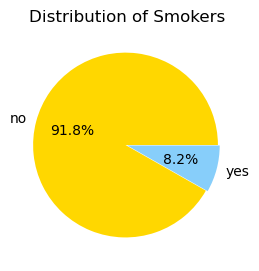

In [64]:
# Pie chart that shows the distribution of smokers
smoker_counts = df['smoker'].value_counts()

explode = [0.02, 0] # It shows for female 0.02 explode and 0 for male
colors=['gold','lightskyblue']

plt.figure(figsize=(3, 3))
smoker_counts.plot(kind='pie', autopct='%1.1f%%', labels=smoker_counts.index,colors=colors, explode=explode)
plt.title('Distribution of Smokers')
plt.ylabel('')  
plt.show()

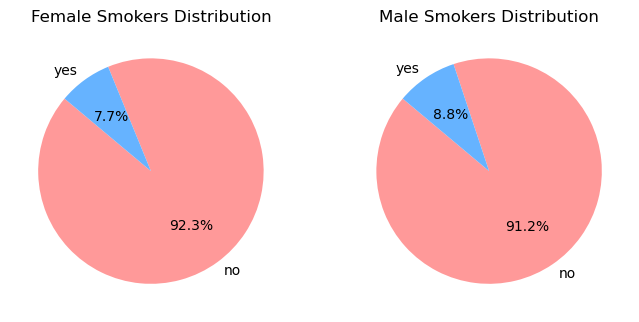

In [69]:
# Distribution of smokers by gender
# Group by 'sex' and 'smoker' to get the counts
smoker_gender_counts = df.groupby(['sex', 'smoker']).size().unstack()

# Plot the pie chart for each gender
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Female smokers
axes[0].pie(smoker_gender_counts.loc['female'], labels=smoker_gender_counts.columns, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
axes[0].set_title('Female Smokers Distribution')

# Male smokers
axes[1].pie(smoker_gender_counts.loc['male'], labels=smoker_gender_counts.columns, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
axes[1].set_title('Male Smokers Distribution')

plt.show()

In [ ]:
# Observations :-
# There are 7.7%  females smokes and 92.3 % female not smoke
# There are 8.8% males smoke and 91.2% males not smoke

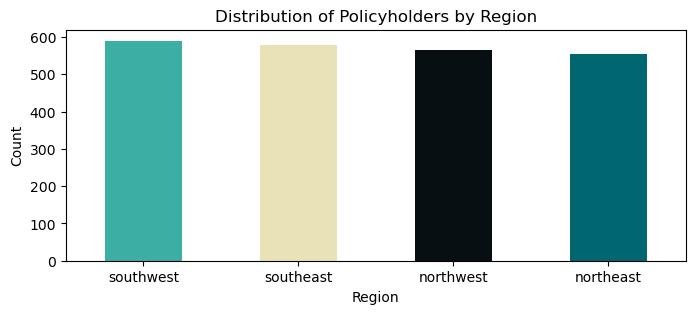

In [45]:
# Distribution of policy holders by region
# Get the value counts for the 'region' column
region_counts = df['region'].value_counts()

#colors
palette=['#3CAEA3', '#eae2b7','#070F12','#006770']

plt.figure(figsize=(8, 3))
region_counts.plot(kind='bar', rot=0, color=palette)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Policyholders by Region')
plt.show()

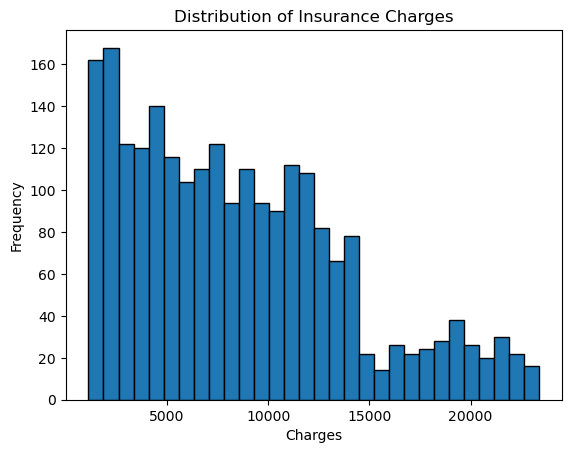

In [58]:
# Distribution of insurance charges
plt.hist(df['charges'], bins=30, edgecolor='black')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance Charges')
plt.show()

In [61]:
# Check for missing values
print("Missing values in data :- ")
missing_values = df.isnull().sum()
print(missing_values)

Missing values in data :- 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [62]:
# There are no missing values present in data

In [74]:
# Convert categorical columns to numeric
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df["region"] = df['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

               age       sex       bmi  children    smoker    region   charges
age       1.000000  0.028985  0.152997  0.026600 -0.132398 -0.014510  0.521521
sex       0.028985  1.000000 -0.001735 -0.010075 -0.019815 -0.001393  0.030805
bmi       0.152997 -0.001735  1.000000 -0.025070 -0.255344 -0.156844 -0.060676
children  0.026600 -0.010075 -0.025070  1.000000 -0.001042 -0.029078  0.105123
smoker   -0.132398 -0.019815 -0.255344 -0.001042  1.000000  0.047018  0.565889
region   -0.014510 -0.001393 -0.156844 -0.029078  0.047018  1.000000  0.081491
charges   0.521521  0.030805 -0.060676  0.105123  0.565889  0.081491  1.000000


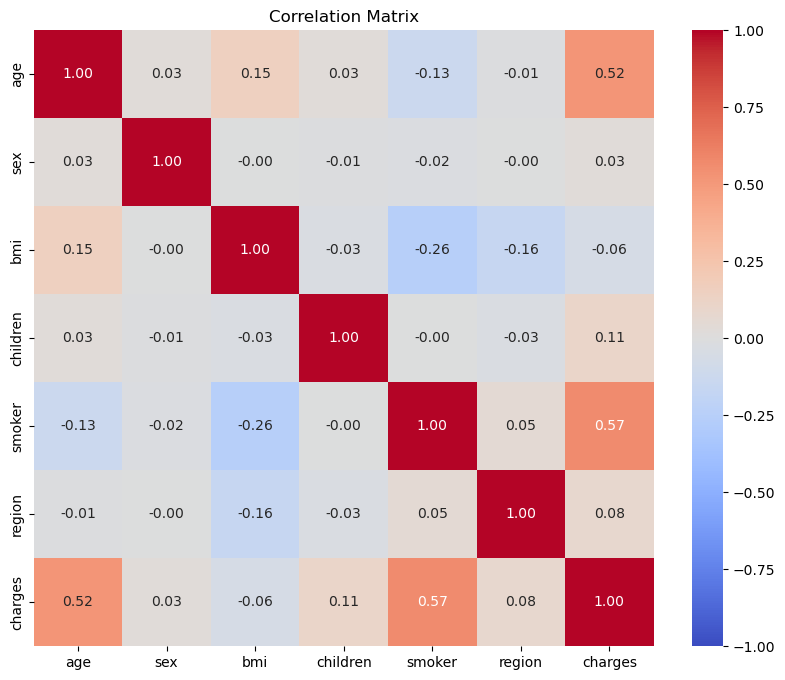

In [78]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Observations from corelation matrix

age and charges have a positive correlation coefficient of approximately 0.522. This suggests that as age increases, insurance charges also tend to increase, although the correlation is moderate.


smoker and charges have a stronger positive correlation coefficient of about 0.57. This indicates that being a smoker is positively associated with higher insurance charges.

bmi and charges have a negative correlation coefficient of approximately -0.06. This suggests a weak negative relationship, implying that higher BMI might slightly correlate with lower charges, although this correlation is not strong

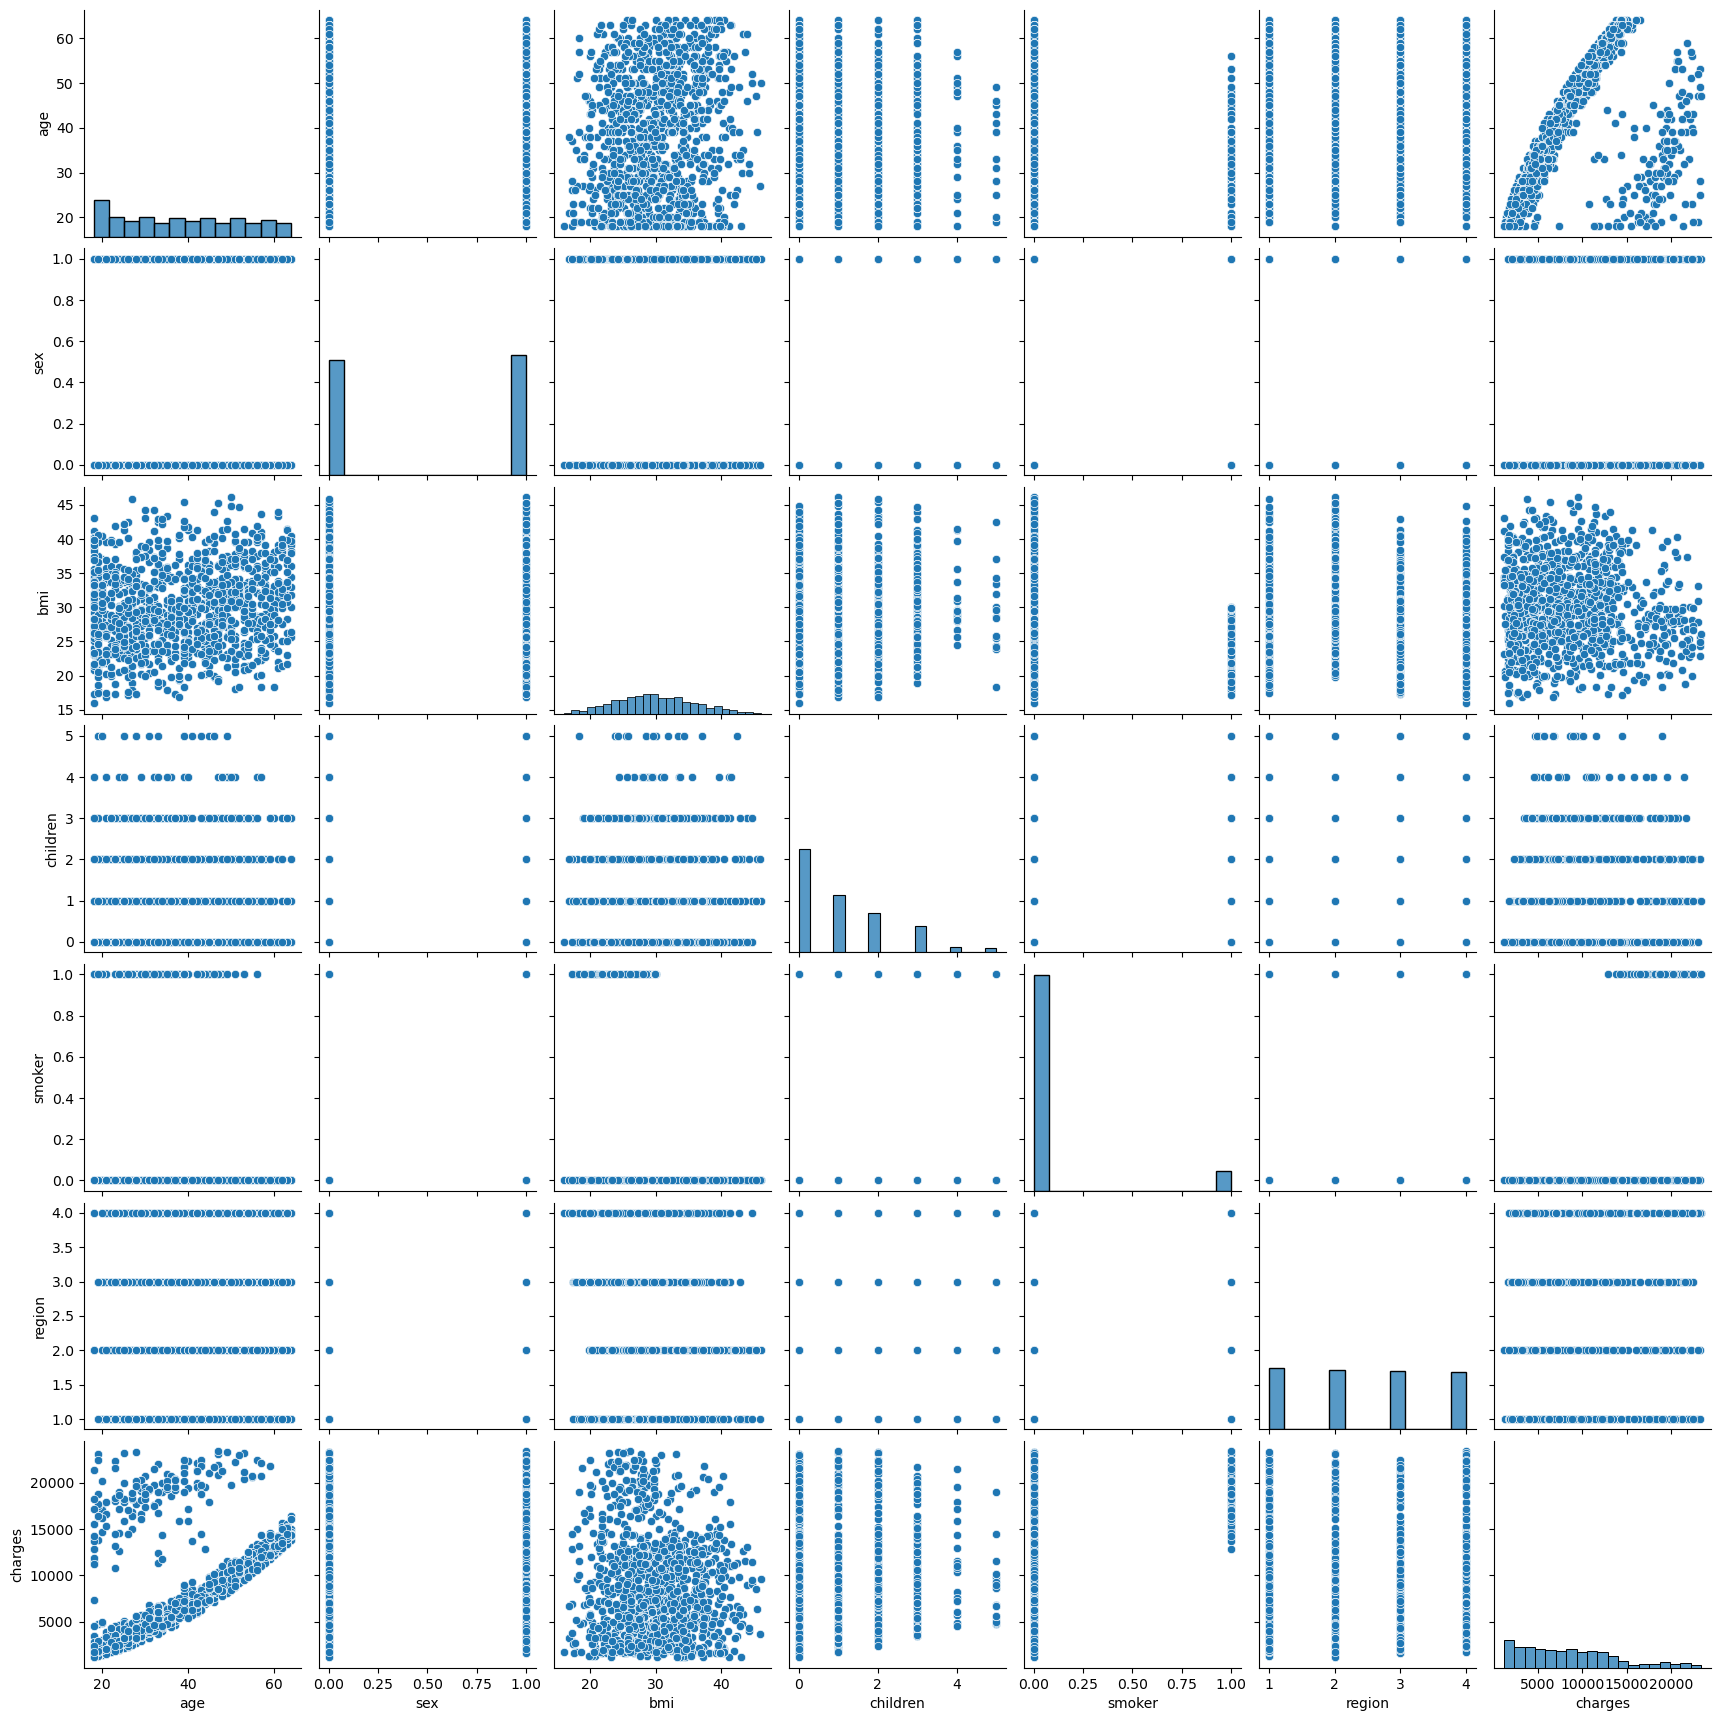

In [79]:
# Pairplot for all the columns
sns.pairplot(data=df)
plt.show()

In [81]:
# Separating Feature and target variable
X=df.drop(columns=['charges']) # Feature
y=df["charges"] # Target

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=60)

### Training data using Linear regression and evaluating

In [83]:
model = LinearRegression()

In [84]:
model.fit(X_train,y_train)

LinearRegression()

In [85]:
model.score(X_test,y_test)

0.6587936555883602

In [86]:
model.score(X_train,y_train)

0.7115682653138815

### Training data using Random Forest Regressor and evaluating

In [101]:
model_rfr = RandomForestRegressor()

In [102]:
model_rfr.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
model_rfr.score(X_test,y_test)

0.8559252349203263

In [104]:
model_rfr.score(X_train,y_train)

0.9721855081141605

In [108]:
y_predict=model_rfr.predict(X_test)
# Calculate R² score
r2 = r2_score(y_test, y_predict)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predict)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R² Score: 0.8551
Mean Absolute Error (MAE): 745.76
Mean Squared Error (MSE): 4369176.66


In [115]:
# Example: Predicting for a 19-year-old male with a BMI of 25, no children, smoker, and from region 2
X_new = [[19, 1, 25, 0, 1, 2]]

# Make prediction
charge_prediction = model_rfr.predict(X_new)

# Print the predicted charge
print(f"Predicted insurance charge: ${charge_prediction[0]:.2f}")


Predicted insurance charge: $16395.66
